# 0. Simulate phone dataset
## A

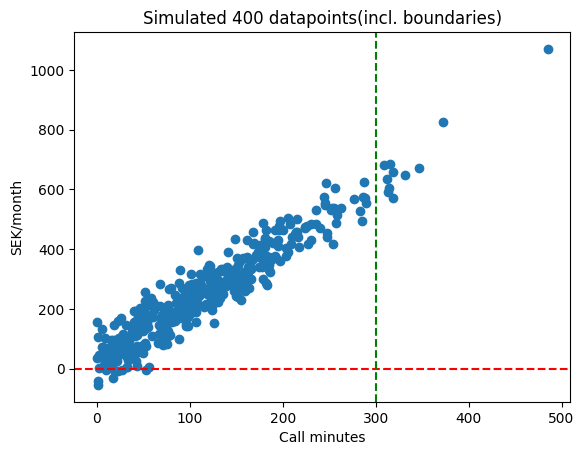

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(42)
x = np.random.normal(100, 100, size=400) # normalfördelning

x = np.abs(x) # tar bort negativa nummer (absolutvärde)

epsilon = np.random.normal(0, 50, size=400)

y = 2*x + 25 + epsilon

plt.scatter(x, y)
plt.title("Simulated 400 datapoints(incl. boundaries)")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.axhline(y=0, color="red", linestyle="--")
plt.axvline(x=300, color="green", linestyle="--")

# B

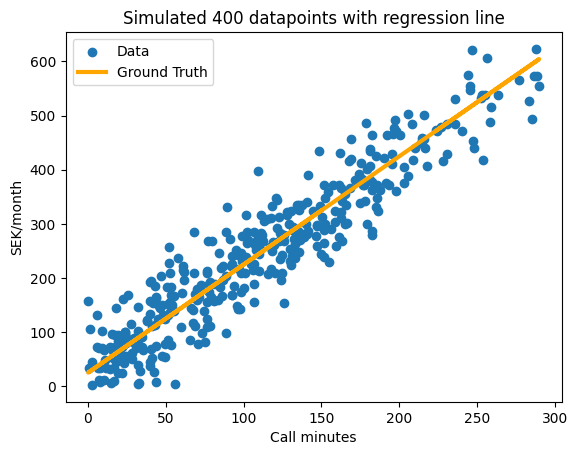

In [46]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.normal(100, 100, size=400) # normalfördelning

x = np.abs(x) # tar bort negativa nummer (absolutvärde)

epsilon = np.random.normal(0, 50, size=400)

y = 2*x + 25 + epsilon

# Tar bort punkter över 300, och under 0
mask = (x < 300) & (y > 0)
x = x[mask]
y = y[mask]


plt.scatter(x, y)
plt.plot(x, 25 + 2 * x, color='orange', linewidth=3) # regressionslinje med sanna parametrar
plt.gca().legend(("Data", "Ground Truth")) # legend uppe i vänstra hörnet
plt.title("Simulated 400 datapoints with regression line")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.show()


In [139]:
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
...,...,...
376,53.082435,183.822512
377,71.313453,165.649148
378,235.387237,529.849510
379,88.546015,203.507950


# 1. Train | test split

## Riktig funktion enligt code-along

In [56]:
df_X = df["x"]
df_y = df["y"]

def train_test_split_func(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float, random_state: int, replace: bool) -> tuple:
    
    # Bestämmer andel procent training data
    train_fraction = int(len(X) * train_fraction)

    # plockar ut sample training data
    X_sample_train = X.sample(n= train_fraction, random_state=random_state, replace=replace)
    y_sample_train = y.sample(n= train_fraction, random_state=random_state, replace=replace)

    # Plockar ut sample test data
    X_sample_test = X.drop(X_sample_train.index)
    y_sample_test = y.drop(y_sample_train.index)

    # Skapar nya dataframes med training-, och test-data
    X_train, y_train = pd.DataFrame(X_sample_train), y_sample_train
    X_test, y_test = pd.DataFrame(X_sample_test), y_sample_test

    X_train.insert(0, "Intercept", 1)
    X_test.insert(0, "Intercept", 1)

    return (X_train, y_train, X_test, y_test)


In [64]:
X_train, y_train, X_test, y_test = train_test_split_func(df_X, df_y, train_fraction=0.7, random_state=42, replace=False)

In [48]:
#X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

# 2.

In [66]:
regression_fit = lambda X, y: np.linalg.inv(X.T@X) @ X.T @ y
predict = lambda X, weights: X @ weights

beta_hat = regression_fit(X_train, y_train)


pandas.core.series.Series

In [68]:
beta_hat[0]
beta_hat[1]

1.910505914786179

In [ ]:
regression_line = lambda x, b0, b1: b0 + (b1*x)

reg_line = regression_line(X_train, beta_hat[0], beta_hat[1])

In [70]:
reg_line

,Intercept,x
266,34.131983,108.600279
192,34.131983,54.410583
46,34.131983,135.266759
55,34.131983,401.193686
57,34.131983,164.196861
...,...,...
41,34.131983,256.012080
294,34.131983,467.370703
206,34.131983,440.222556
254,34.131983,175.018774


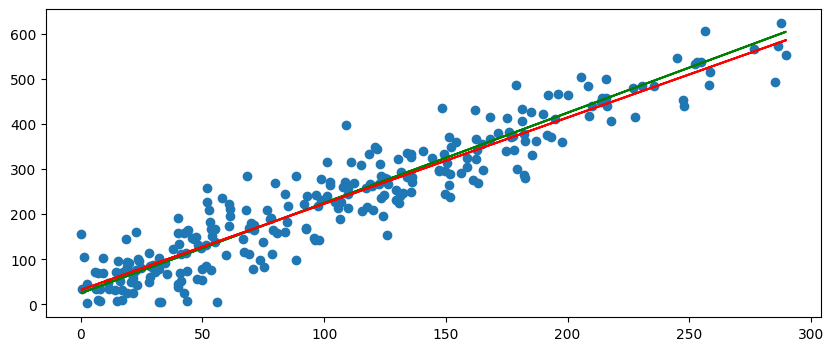

In [86]:
plt.figure(figsize=(10, 4))
plt.scatter(X_train['x'], y_train)
plt.plot(X_train['x'], 25 + 2 * X_train['x'], color="green")
plt.plot(X_train['x'], reg_line['x'], color="red" )

# Med SKlearn

In [ ]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X_train, y_train)

# plt.figure(figsize=(12,4))
# plt.scatter(X_train, y_train)
# plt.plot(X_train, 25 + 2 * X_train, color='green', linewidth=2) # ground truth
# plt.plot(X_train, model.predict(X_train), color='red', linewidth=2) # regression line


# 3

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 2), (115, 2), (266,), (115,))

In [110]:
predict = lambda X, weights: X @ weights
#beta_hat = beta_hat.to_numpy()
#X_test = X_test.to_numpy()
np.reshape(beta_hat, (2,1))
y_hat = predict(X_test, beta_hat)
y_hat = np.reshape(y_hat, -1)

In [133]:
y_hat.shape, beta_hat.shape

((115,), (2,))

In [ ]:
X_test[:, 1] # Selecting column 1

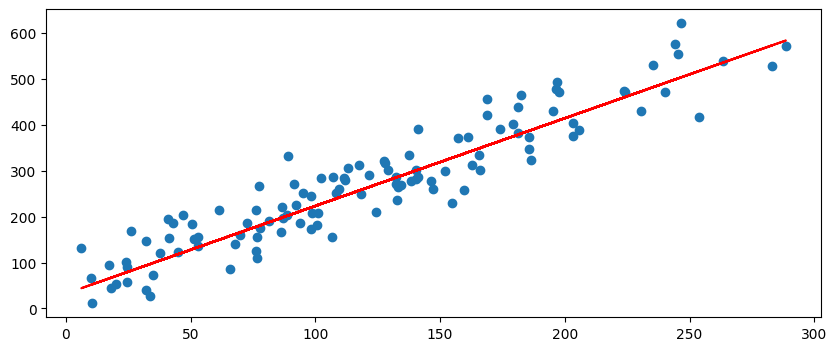

In [134]:
plt.figure(figsize=(10,4))
plt.scatter(X_test[:, 1], y_test)
plt.plot(X_test[:, 1], y_hat, color="red")

In [138]:
m = len(y_test)
y_hat = np.reshape(y_hat, (m)) # Tar bort extra dimensionen

MAE = 1 / m * np.sum(np.abs(y_test - y_hat))
MSE = 1 / m * np.sum((y_test - y_hat) ** 2)
RMSE = np.sqrt(MSE)

print(f"Mean absolute error: {MAE}")
print(f"Mean squared error: {MSE}")
print(f"Root mean square error: {RMSE}")

Mean absolute error: 40.12002651149212
Mean squared error: 2401.577128867729
Root mean square error: 49.00588871623214


# 4